In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
traffic_df = pd.read_csv("traffic_data.csv")

In [ ]:
## Data Exploration

In [3]:
traffic_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,New Years Day,263.49,0.0,0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
1,None,263.78,0.0,0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502
2,None,264.16,0.0,0,75,Snow,heavy snow,2013-01-01 02:00:00,933
3,None,263.95,0.0,0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576
4,None,263.65,0.0,0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372


In [4]:
traffic_df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                  int64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [5]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8573 entries, 0 to 8572
Data columns (total 9 columns):
holiday                8573 non-null object
temp                   8573 non-null float64
rain_1h                8573 non-null float64
snow_1h                8573 non-null int64
clouds_all             8573 non-null int64
weather_main           8573 non-null object
weather_description    8573 non-null object
date_time              8573 non-null object
traffic_volume         8573 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 602.9+ KB


In [6]:
traffic_df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,8573.000000,8573.000000,8573.0,8573.000000,8573.000000
mean,278.976352,0.161284,0.0,52.560947,3286.762160
std,13.322459,1.439626,0.0,37.470062,2028.322769
min,244.820000,0.000000,0.0,0.000000,164.000000
25%,269.460000,0.000000,0.0,1.000000,1193.000000
50%,277.330000,0.000000,0.0,64.000000,3344.000000
75%,290.400000,0.000000,0.0,90.000000,5001.000000
max,308.240000,55.630000,0.0,100.000000,7217.000000


In [7]:
traffic_df.shape

(8573, 9)

In [38]:
print(traffic_df.isnull().sum())
print('Total number of NaN in the dataframe: ', traffic_df.isnull().sum().sum())

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64
Total number of NaN in the dataframe:  0


In [8]:
print("first date:" + " " + traffic_df.date_time.max())
print("last date:" + " " + traffic_df.date_time.min())

first date: 2013-12-31 23:00:00
last date: 2013-01-01 00:00:00


In [ ]:
## Univariate Analysis

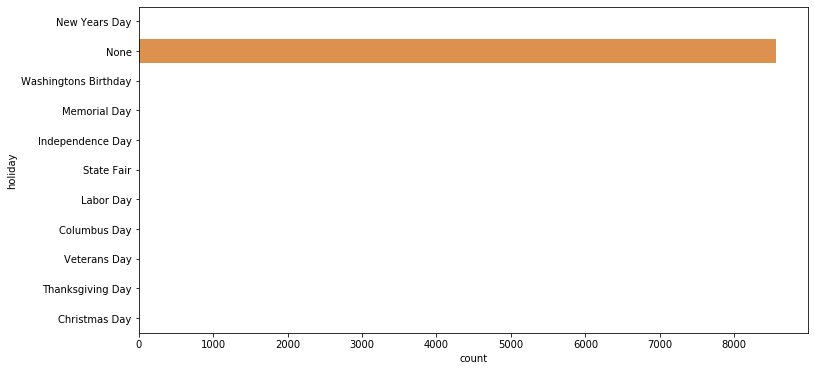

In [9]:
#Plotting frequency of each category in holiday column
plt.figure(figsize = (12,6))
sns.countplot(y='holiday', data = traffic_df)
plt.show()

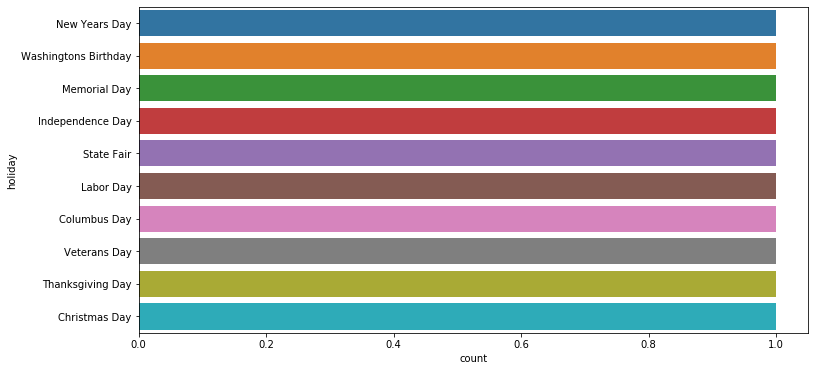

In [10]:
# Removing 'None' data from Holidays to visualize the others. Only 1 count per holiday!
holidays = traffic_df.loc[traffic_df.holiday != 'None']
plt.figure(figsize=(12,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

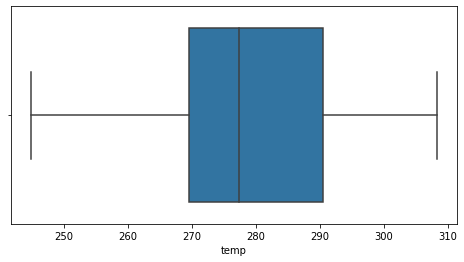

In [11]:
#plotting distribution of temperature variable
plt.figure(figsize=(8,4))
sns.boxplot('temp', data = traffic_df)
plt.show()

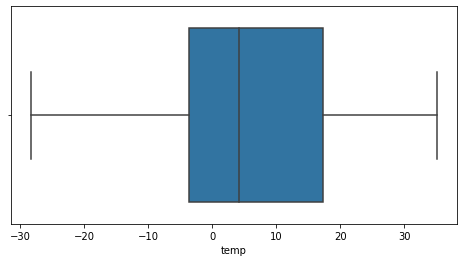

In [12]:
#Temperature is measured in Kelvin, changing to degree celsius to make it more intuitive
#convert kelvin to celsius
#(0K − 273.15)
traffic_df['temp'] = (traffic_df['temp']-273.15)
plt.figure(figsize=(8,4))
sns.boxplot('temp', data = traffic_df)
plt.show()

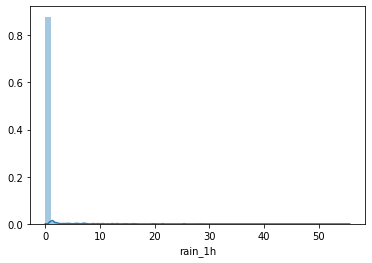

In [13]:
#Plotting rain variable
plt.figure(figsize=(6,4))
sns.distplot(traffic_df.rain_1h)
plt.show()
#From the distribution, it shows that the data is extremely skewed. Most of the observations are concentrated around 0.

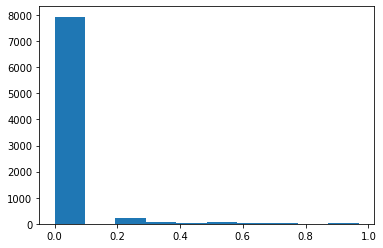

In [14]:
#Plotting observations with values less than 1mm rain shows that around 8000 observations are around 0.
plt.hist(traffic_df.rain_1h.loc[traffic_df.rain_1h<1])
plt.show()

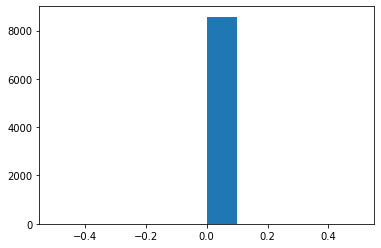

In [15]:
#Plotting snow variable indicates that data is again skewed and most of the observations have value close to 0.0.
plt.hist(traffic_df.snow_1h)
plt.show()

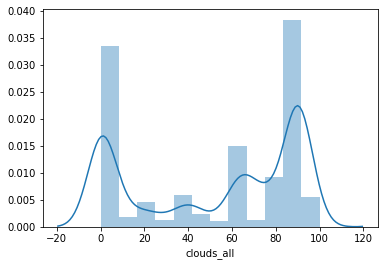

In [16]:
#clouds_all indicates the cloud coverage for the give day and hour
sns.distplot(traffic_df.clouds_all)
plt.show()

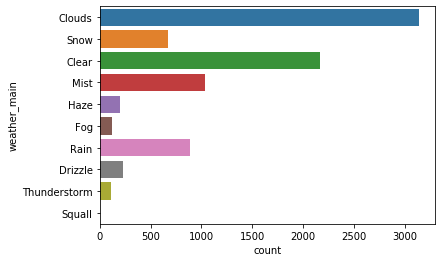

In [18]:
#exploring different categories in weather_main
sns.countplot(y='weather_main', data=traffic_df)

In [4]:
#clouds, rain and snow distribution over different weather conditions
traffic_df.groupby('weather_description').aggregate({'traffic_volume':[np.mean,np.size],
                                                              'clouds_all':'count','rain_1h':'mean','snow_1h':'mean'})

traffic_volume       clouds_all  \
                                              mean  size      count   
weather_description                                                   
SQUALLS                                1345.333333     3          3   
Sky is Clear                           3594.786667   675        675   
broken clouds                          3451.855109  1194       1194   
drizzle                                3163.506667    75         75   
few clouds                             3406.522599   354        354   
fog                                    3154.105691   123        123   
freezing rain                          3866.000000     1          1   
haze                                   3782.925373   201        201   
heavy intensity drizzle                4205.600000    10         10   
heavy intensity rain                   3336.625000    56         56   
heavy snow                             3241.450882   397        397   
light intensity drizzle                3256.986207   145        145   
light intensity shower rain            4846.500000     2          2   
light rain                             3460.011345   617        617   
light rain and snow                    5542.666667     3          3   
light snow                             2679.118812   202        202   
mist                                   2976.545455  1034       1034   
moderate rain                          3171.200000   205        205   
overcast clouds                        3220.798131  1070       1070   
proximity thunderstorm                 2583.050847    59         59   
proximity thunderstorm with drizzle    3881.500000     2          2   
proximity thunderstorm with rain       1730.222222     9          9   
scattered clouds                       3780.372587   518        518   
shower snow                            5664.000000     1          1   
sky is clear                           3124.645248  1494       1494   
snow                                   3035.816901    71         71   
thunderstorm                           1385.571429     7          7   
thunderstorm with drizzle              4592.000000     1          1   
thunderstorm with heavy rain           2655.705882    17         17   
thunderstorm with light drizzle        1338.000000     1          1   
thunderstorm with light rain           3446.615385    13         13   
thunderstorm with rain                 4729.200000     5          5   
very heavy rain                        1617.750000     8          8   

                                       rain_1h snow_1h  
                                          mean    mean  
weather_description                                     
SQUALLS                               4.303333       0  
Sky is Clear                          0.000000       0  
broken clouds                         0.000000       0  
drizzle                               0.170800       0  
few clouds                            0.000000       0  
fog                                   0.111789       0  
freezing rain                         0.000000       0  
haze                                  0.006269       0  
heavy intensity drizzle               0.076000       0  
heavy intensity rain                  3.934107       0  
heavy snow                            0.001914       0  
light intensity drizzle               0.180759       0  
light intensity shower rain           0.000000       0  
light rain                            0.135381       0  
light rain and snow                   0.423333       0  
light snow                            0.276634       0  
mist                                  0.311286       0  
moderate rain                         0.535073       0  
overcast clouds                       0.000000       0  
proximity thunderstorm                2.764237       0  
proximity thunderstorm with drizzle   0.125000       0  
proximity thunderstorm with rain      0.637778       0  
scattered clouds                      0.000000       0

In [ ]:
## Bivariate Analysis

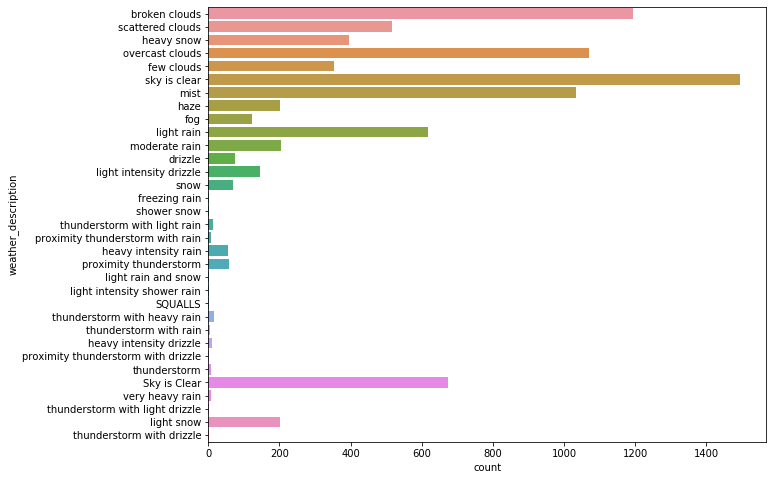

In [19]:
#exploring different categories in weather_description
plt.figure(figsize=(10,8))
sns.countplot(y='weather_description', data=traffic_df)
plt.show()

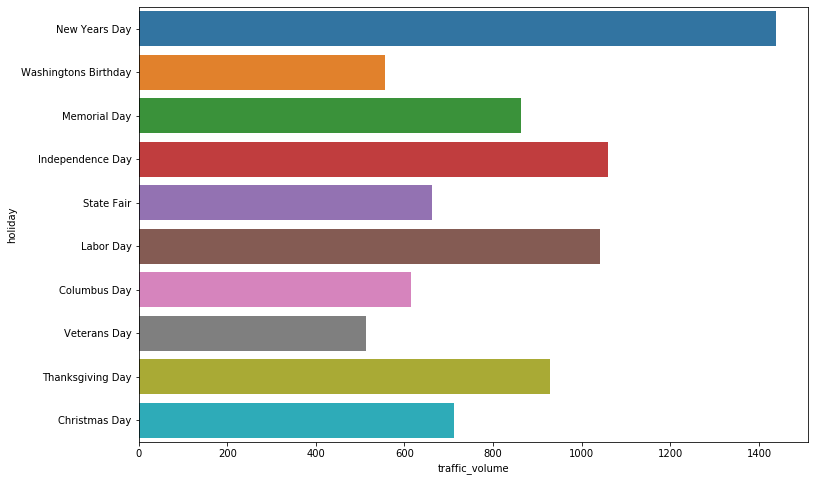

In [24]:
#Exploring traffic volume on holidays. 
plt.figure(figsize=(12,8))
sns.barplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()

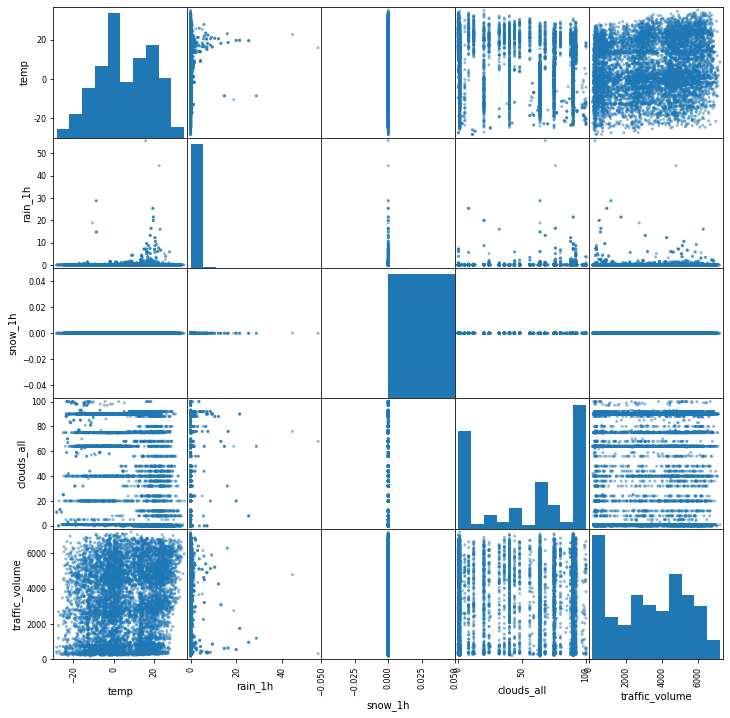

In [28]:
#Plotting relationship between temp, rain_1h, snow_1h, cloud_all.
var_num = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
from pandas.plotting import scatter_matrix
scatter_matrix(traffic_df[var_num],figsize=(12,12))
plt.show()

<Figure size 864x864 with 0 Axes>

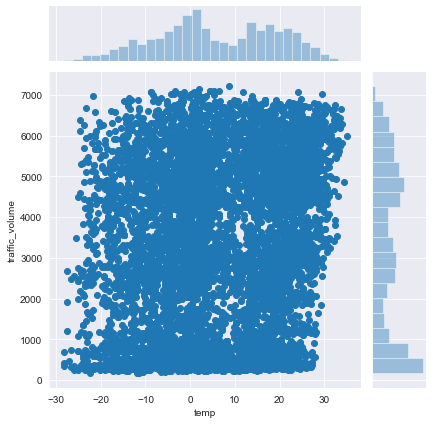

In [31]:
#plotting temperature against traffic volume
plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
sns.jointplot(y='traffic_volume', x='temp', data = traffic_df.loc[traffic_df.temp>-50])
plt.show()

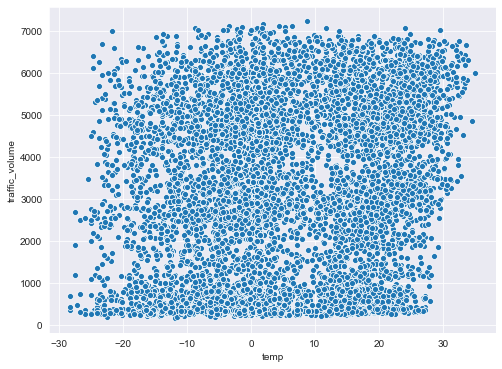

In [32]:
#scatterplot between traffic_volume and temp
plt.figure(figsize=(8,6))
sns.scatterplot(y='traffic_volume', x='temp', data = traffic_df.loc[traffic_df.temp>-50])

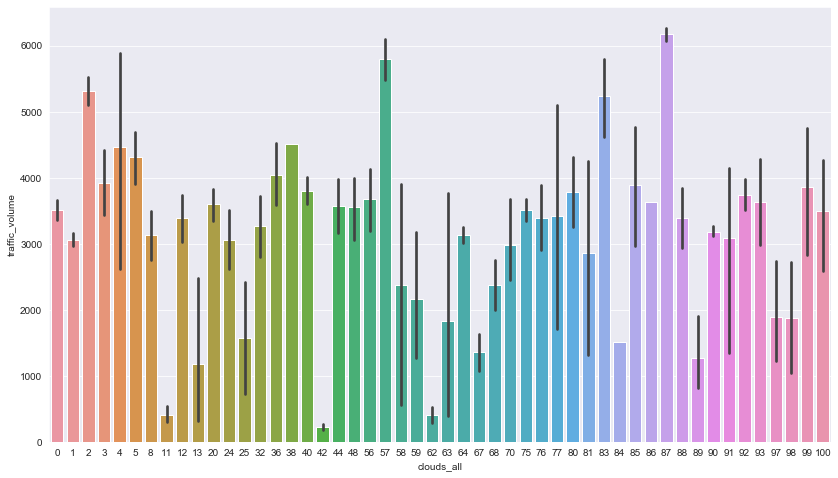

In [33]:
#Plotting traffic volume over clouds_all
plt.figure(figsize=(14,8))
sns.barplot(x='clouds_all', y = 'traffic_volume', data = traffic_df)
plt.show()

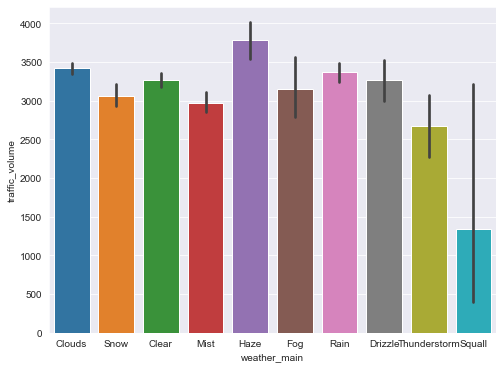

In [34]:
#Plotting weather_main over traffic volume
plt.figure(figsize=(8,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = traffic_df)
plt.show()

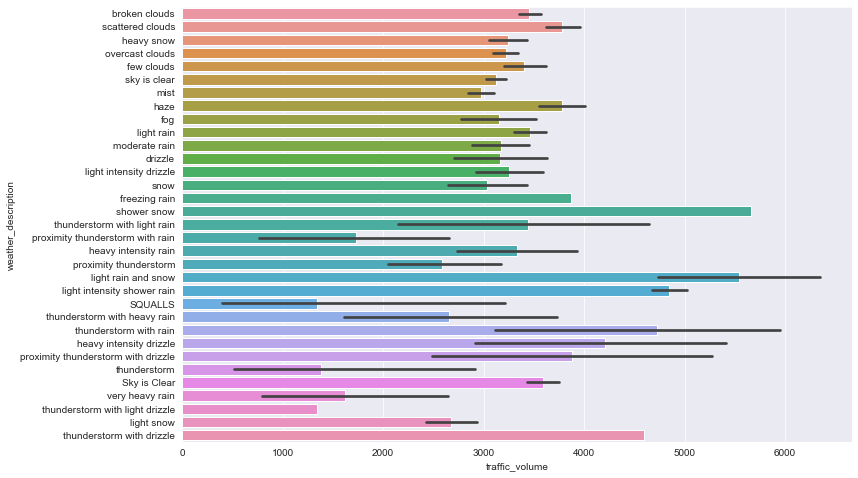

In [35]:
#Plotting weather_description over traffic volume
plt.figure(figsize=(12,8))
sns.barplot(y='weather_description', x = 'traffic_volume', data = traffic_df)
plt.show()

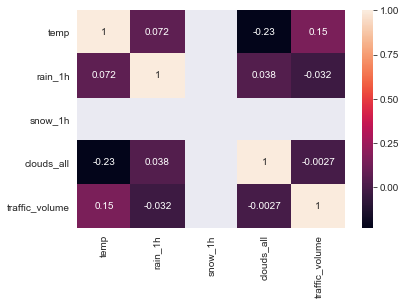

In [36]:
#correlation between different numeric variables. plot shows no strong correlation between traffic and other variables
sns.heatmap(traffic_df.corr(), annot=True)
plt.show()

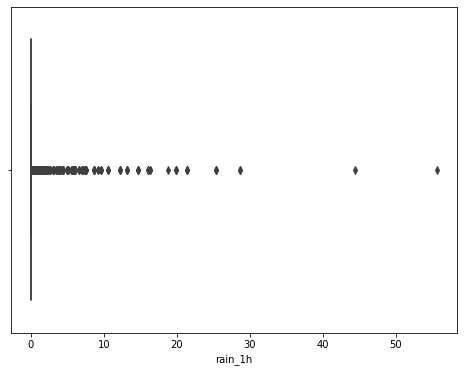

In [5]:
#Plotiing rain data
plt.figure(figsize=(8,6))
sns.boxplot('rain_1h',data = traffic_df)
plt.show()